<a href="https://colab.research.google.com/github/lfmarin/clases-ia/blob/main/Reconocimiento_de_N%C3%BAmeros_(ANN_b%C3%A1sico).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tópicos Avanzados de Inteligencia Artificial
## Dr. Luis Felipe Marín Urías

Tutorial básico para cargar imágenes en escala de grises de números escritos a mano y categorizarlas/identificarlas como números por medio de Redes Neuronales Artificiales.

lo primero que se debe hacer es cargar las bibliotecas que pertenecen a tensorflow.

Mnist es un dataset que que contiene varias imágenes de números escritos a Mano

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

Ahora, hay que cargar el conjunto de datos (dataset) hay que dividir ese conjunto en 2 (mínimo). Una para entrenar la base de datos y otra para probar que tan bien funciona la red neuronal.

xtrain = entradas para entrenamiento (imágenes en escala de grises).

ytrain = salidas para entrenamiento (número que representa cada imagen).

xtest = Entradas para probar la red. (ningún elemento de aquí se encuentra en el entrenamiento.

ytest = Salidas para probar.

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Incluímos unas bibliotecas para poder visualizar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


nuestras imágenes para entrenar son 60000 y miden 28x28 pixeles.

In [ ]:
xtrain.shape

(60000, 28, 28)

pyplot para mostrar una de las imágenes. La 9 en este caso que corresponde al número 4 y la 1 que corresponde al 0 (se puede ver como el negativo de una hoja en blanco)

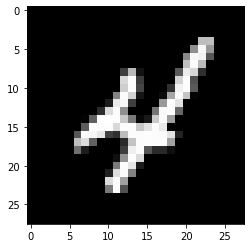

In [ ]:
plt.imshow(xtrain[9], cmap="gray")

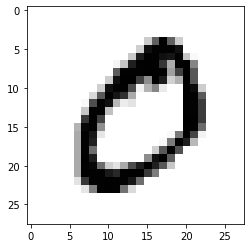

In [ ]:
plt.imshow(xtrain[1], cmap="gray_r")

las salidas son un arreglo donde cada posición corresponde al número que queremos obtener.  xtrain[9] => ytrain[9] y xtrain[1] => ytrain[1]

In [ ]:
ytrain[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**note**:
📍 es importante aquí saber que cuando tratamos con redes neuronales, normalmente en la capa de salida ponemos una neurona por salida deseada, como aquí son 10 dígitos pondremos 10 neuronas de salida, por lo que tenemos que transformar las salidas en ytrain y ytest.

Ejemplo:

ytest[1] -> 0  👉 ytest[1] -> [1,0,0,0,0,0,0,0,0,0]



para realizar eso tenemos una función que nos convierte de un formato a otro:

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_cat_train = to_categorical(ytrain,10)
y_cat_test = to_categorical(ytest,10)

después de convertirlos nos queda en formato de arreglo:

In [ ]:
y_cat_train.shape

(60000, 10)

In [ ]:
y_cat_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Finalmente, después de haber preparado los datos, creamos una red neuronal Densa (totalmente conectada) que tenga 28 neuronas de entrada, con una matrix de 28x28 es decir 784 entradas para las 28 neuronas.



***nota:***

normalmente se pone una neurona por entrada y las entradas entre mas simples mejor, es decir valores de 0 a 1 y si son binarias se simplifica aún mas  la operación.

In [ ]:
red = Sequential() #red neuronal de tipo secuencial.

red.add(Dense(28, input_shape=(28,28), activation="relu")) # capa de entrada
red.add(Flatten()) #aqui se ponen las entradas de matriz a un vector unidimensional
red.add(Dense(25, activation="relu")) # capa oculta de 25
red.add(Dense(10, activation="softmax")) # capa de salida

red.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
red.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 28, 28)            812       
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 25)                19625     
                                                                 
 dense_8 (Dense)             (None, 10)                260       
                                                                 
Total params: 20,697
Trainable params: 20,697
Non-trainable params: 0
_________________________________________________________________


Ahora se pone a entrenar la red con el conjunto de entrenamiento con 50 epocas (50 veces):

In [ ]:
historial = red.fit(x=xtrain, y=y_cat_train, validation_data=(xtest, y_cat_test), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5559 - accuracy: 0.5957 - val_loss: 0.8271 - val_accuracy: 0.7636
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6062 - accuracy: 0.8315 - val_loss: 0.4858 - val_accuracy: 0.8768
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3546 - accuracy: 0.9051 - val_loss: 0.3207 - val_accuracy: 0.9215
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2652 - accuracy: 0.9276 - val_loss: 0.2680 - val_accuracy: 0.9278
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2241 - accuracy: 0.9380 - val_loss: 0.2333 - val_accuracy: 0.9335
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1982 - accuracy: 0.9443 - val_loss: 0.2061 - val_accuracy: 0.9422
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1813 - accuracy: 0.9474 - val_loss: 0.1992 - val_accuracy:

terminó la red neuronal de entrenar 50 epocas y nos muestra el resultado de la siguiente forma:


*   **loss: 0.0883** Aquí se refiere al error al clasificar un número correctamente, debe tender a 0.
*   **accuracy: 0.9751** Este dato nos dice que tan bien clasifica los números correctamente en este caso **97.51% **de certitud con los números con los que entrenó.
*   **val_loss: 0.2425** Este es también un error, pero contra el conjunto de validación, o sea números que nunca ha visto.
*   **val_accuracy:** 0.9548 Este es que tan bien clasifica números con los que no entren´.

Podemos observar que los números de validación difieren de los números con los que entrenó, es natural que el error incremente, 0.0883 vs 0.2425, y que la certitud disminuya, 97.51% vs 95.51%, al momento de validar con datos con los que el algoritmo no nunca aprendió.









Finalmente, podemos ver la evolución de la certitud y del error de manera gráfica gracias al historial que se guardó al momento del entrenamiento a lo largo de las 50 epocas.

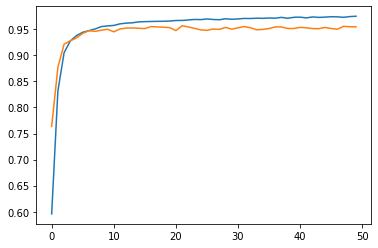

In [ ]:
import pandas as pd

datos = pd.DataFrame(historial.history)
#certitud
datos.accuracy.plot()
datos.val_accuracy.plot()

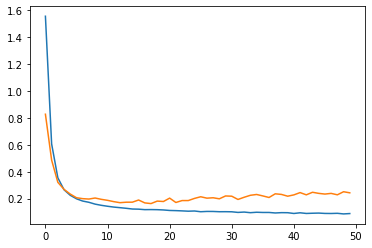

In [ ]:
#error
datos.loss.plot()
datos.val_loss.plot()

En ambas gráficas podemos ver un estancamiento, en el aprendizaje (arriba) con respecto a la validación (línea naranja) a partir de la epoca 10, esto significa que por más que ajustemos al conjunto de entrenamiento y siga mejorando, ya no tendrá mejora sustancial.

En la gráfica del error (abajo), podemos ver que no hay una disminución sustancial en la validación a partir de alrededor de la epoca 12, incluso, el error empieza a incrementar a partir de la 20 aproximadamente. El incremento en la validación nos señala un posible sobreentrenamiento en la red.

si hacemos la predicción con el conjunto de validación, podemos ver los resultados individuales.

In [ ]:
predicciones = red.predict(xtest)

el resultado nos muestra 10 valores de predicción para cada número por  cada imagen, permitiendonos dar un ranking de probabilidad con respecto a la clasificación de cada número. Es decir, la posición con el mayor valor sera el número que la red cree que es el mas probable.

In [ ]:
predicciones


array([[1.08659690e-13, 4.36404312e-17, 2.11847877e-22, ...,
        9.99999881e-01, 6.30747558e-23, 1.16267856e-07],
       [5.13286084e-15, 2.08299397e-03, 9.96436954e-01, ...,
        2.65915096e-05, 6.83325662e-12, 8.08456200e-21],
       [1.57735608e-15, 9.99912858e-01, 1.29983304e-27, ...,
        1.42093126e-09, 3.04768062e-29, 6.42682009e-19],
       ...,
       [4.52099346e-15, 6.15283801e-15, 1.10030181e-08, ...,
        5.81221106e-13, 2.36397208e-16, 1.11051108e-07],
       [8.87607484e-07, 1.88923778e-07, 1.26977195e-09, ...,
        6.35692174e-08, 5.40488102e-02, 1.00221129e-07],
       [6.53415106e-27, 0.00000000e+00, 1.30793976e-27, ...,
        0.00000000e+00, 1.55619969e-35, 0.00000000e+00]], dtype=float32)

argmax será la función que nos permitirá determinar de cada vector de respuesta, el número con mayor valor

In [ ]:
ymess = np.argmax(y_cat_test, axis=1)
predmess= np.argmax(predicciones, axis=1)


array([7, 2, 1, ..., 4, 5, 6])

finalmente podemos analizar los resultados de la certitud, con lo conocemos una matriz de confusión así como el reporte de clasificación.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ymess, predmess))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.95      0.93      0.94      1010
           4       0.97      0.95      0.96       982
           5       0.95      0.93      0.94       892
           6       0.95      0.98      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.92      0.95      0.93       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
result = confusion_matrix(ymess, predmess)
print(result)

[[ 964    1    1    1    3    0    4    0    5    1]
 [   0 1117    3    1    0    0    3    1   10    0]
 [  11    2  967   13    1    2   12   13   11    0]
 [   1    3   12  937    1   31    1    7   12    5]
 [   3    2    2    0  930    0    9    1    9   26]
 [   3    4    2   19    1  833   11    2   12    5]
 [   3    2    3    0    3    6  938    0    3    0]
 [   0    8    6    3    4    1    0  989    3   14]
 [  13    0    9    4    4    3    5    4  927    5]
 [   6    6    1   10    8    5    0    6   21  946]]


**nota:**

para mas detalle al respecto de como evaluar nuestros clasificadores recomiendo esta página WEB:
https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20shows%20how%20often%20a,objects%20of%20the%20target%20class.

Ahora, haremos lo mismo pero con redes neuronales convolucionales o CNN

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from keras.layers import Conv2D, MaxPool2D

In [ ]:
xtrain =  xtrain.reshape(60000, 28, 28, 1)
xtest =  xtest.reshape(10000, 28, 28, 1)

In [ ]:
model = Sequential()
#capa de convolución
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation="relu"))
#capa de max pooling
model.add(MaxPool2D(pool_size=(2,2)))
#traducción para capa densa
model.add(Flatten())
#ahora si va la capa densa (fully connected)
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
hist =model.fit(x=xtrain, y=y_cat_train, validation_data=(xtest, y_cat_test), epochs=2)

Epoch 1/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.6536 - accuracy: 0.9472 - val_loss: 0.1061 - val_accuracy: 0.9710
Epoch 2/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0784 - accuracy: 0.9804 - val_loss: 0.0865 - val_accuracy: 0.9811


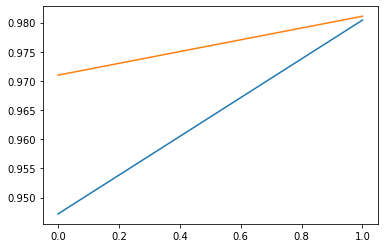

In [ ]:
datos = pd.DataFrame(hist.history)

datos.accuracy.plot()
datos.val_accuracy.plot()

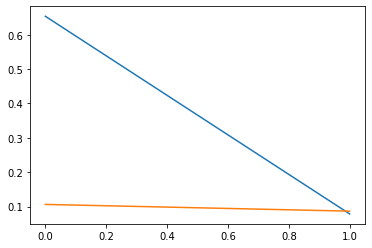

In [ ]:
datos.loss.plot()
datos.val_loss.plot()

In [ ]:
predicciones = model.predict(xtest)

In [ ]:
ymess = np.argmax(y_cat_test, axis=1)
predmess= np.argmax(predicciones, axis=1)
print(classification_report(ymess, predmess))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
result = confusion_matrix(ymess, predmess)
print(result)

[[ 969    2    2    0    0    0    4    1    2    0]
 [   0 1120    4    2    1    2    0    0    6    0]
 [   0    1 1017    3    1    0    2    7    1    0]
 [   0    0    1  995    0   11    0    1    1    1]
 [   0    2    1    0  971    0    1    0    1    6]
 [   2    0    0    4    0  880    4    0    0    2]
 [   4    2    0    1    8    6  936    0    1    0]
 [   0    6    9    4    4    0    0  995    2    8]
 [   5    2    3    4    2    1    5    2  946    4]
 [   2    4    1    3    7    7    0    1    2  982]]



**Práctica:**

intenta mejorar los resultados con una red neuronal nueva.

Probar:


*   Datos de entrada, ¿debemos hacer un procesamiento previo de la imagen?
*   Morfología de la red neuronal: mas/menos neuronas en una capa o más/menos capas ocultas.
*   Tiempo de entrenamiento, ¿debemos aumentar o reducir el tiempo?
*   Función de activación, ¿Debemos introducir una función diferente?






In [ ]:
xtrain[9]

array([0], dtype=uint8)